# Backtest grid trading with geometric brownien motion price movements 

In [13]:
from price_dynamic import *
from bt_grid_trading import *
from grid_trading_loss import *
from IPython.utils import io

import multiprocessing
import matplotlib.pyplot as plt

In [20]:
profits = [100, 1100, 10, -10, 3]
pd.cut(profits, 3, labels=[1,2,3])


[1, 3, 1, 1, 1]
Categories (3, int64): [1 < 2 < 3]

In [29]:
a, b = pd.qcut(profits, 3, labels=[1,2,3], retbins=True)
print(a, b)

[3, 3, 2, 1, 1]
Categories (3, int64): [1 < 2 < 3] [ -10.            5.33333333   70.         1100.        ]


In [30]:
import pandas as pd
import numpy as np

df_nums = pd.DataFrame({'num': np.random.randint(1, 100, 10)})
print(df_nums)

df_nums['num_bins'] = pd.cut(x=df_nums['num'], bins=[1, 25, 50, 75, 100])
df_nums['num_bins'] = pd.qcut(x=df_nums['num'],q = 5, labels=[1,2,3,4,5])
print(df_nums)

   num
0   33
1   89
2   24
3   56
4   66
5   78
6    4
7    1
8   78
9    7
   num num_bins
0   33        3
1   89        5
2   24        2
3   56        3
4   66        4
5   78        4
6    4        1
7    1        1
8   78        4
9    7        2


In [15]:
# 
inputs = {
    "X0": 10000,
    "T": 0.083,
    "mu": 0,
    "sigma": 0.6,
    "N": 2,
    "seed": 1,
    "interval_number": 10,
    
    # Grid trading parameters
    "r": 0.02,
    "n_grid": 4,
}


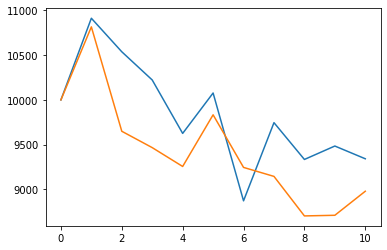

In [16]:
# Price dynamic 
X = geometric_brownien_motion(inputs)

# Plot
plt.figure()
for i in range(2):
    plt.plot(X[i,:])

In [10]:
def bt_gt(X, inputs):
    bt = StaticGridBT(
            0,
            inputs["r"],
            inputs["n_grid"],
            "arth",
            pd.Series(X),
            is_trading_even=False,
            tx_m=0,
            tx_t=0,
            grid_quantity=0.01,
        )

    with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
        bt.run_on_bar()
    

    final_price = X[-1]
    final_wealth = bt.wealth.iloc[-1]
    
    return [final_price, final_wealth]

In [11]:
x = bt_gt(X[1, :], inputs)

In [14]:
# init pool
p = multiprocessing.Pool(multiprocessing.cpu_count() - 1)

# start multiprocess -- optimization
res = p.starmap(bt_gt, X)
p.close()
p.join()

TypeError: bt_gt() takes 2 positional arguments but 10001 were given